# Bank marketing campaigns dataset - Opening Term Deposit

## Problem Statement

#### Bank marketing campaigns dataset analysis # Opening a Term Deposit. It is a dataset that describing Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

#### To identify potential customers who opened term deposit in their bank.

## Packages used:-

In [ ]:
import pandas as pd

import numpy as np

import scipy

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,KFold

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from imblearn.over_sampling import SMOTE

from scipy.stats import skew,kurtosis,boxcox,boxcox_normmax

In [ ]:
from sklearn import metrics

from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,recall_score,auc,make_scorer

from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Algorithms Used:-

1.     Logistic Regression
           1.1 LR Bagging Classifier
           1.2 LR Adaboost Classifier
           1.3 LR Kfold Bagging Classifier
2.     Decision Tree
           2.1 Decision Tree - Gini - Regularized
           2.2 Decision Tree - Entropy - Regularized
           2.3 Decision Tree - Bagging Classifier
           2.4 Decision Tree - Adaboost Classifier
           2.5 Decision Tree - Gradient Classifier
3.     Random Forest
           3.1 Random Forest - Entropy - Regularized
           3.2 Random Forest - Kfold Bagging Classifier
           3.3 Random Forest - Adaboost Classifier
           3.4 Random Forest - Gradient Classifier
4.     KNN
           4.1 KNN - Bagging Classifier
           4.2 KNN - Parameter Optimization
5.     SVM
6.     Naive Bayes - GausianNB

## Import dataset

In [ ]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Data Preprocessing or Data Cleaning:-

### Check duplicates:-

In [ ]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


### Remove duplicates:-

In [ ]:
df.drop_duplicates(inplace=True)

### Reseting Index:-

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop('index',axis=1,inplace=True)

In [ ]:
df

,level_0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Null Check:-

In [ ]:
df.isnull().sum()

level_0           0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Datatype Check:-

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   level_0         41176 non-null  int64  
 1   age             41176 non-null  int64  
 2   job             41176 non-null  object 
 3   marital         41176 non-null  object 
 4   education       41176 non-null  object 
 5   default         41176 non-null  object 
 6   housing         41176 non-null  object 
 7   loan            41176 non-null  object 
 8   contact         41176 non-null  object 
 9   month           41176 non-null  object 
 10  day_of_week     41176 non-null  object 
 11  duration        41176 non-null  int64  
 12  campaign        41176 non-null  int64  
 13  pdays           41176 non-null  int64  
 14  previous        41176 non-null  int64  
 15  poutcome        41176 non-null  object 
 16  emp.var.rate    41176 non-null  float64
 17  cons.price.idx  41176 non-null 

### Stats Check:-

In [ ]:
df.describe()

,level_0,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,20587.500000,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,11886.631679,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,0.000000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10293.750000,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20587.500000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30881.250000,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41175.000000,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Columns Check:-

In [ ]:
df.columns

Index(['level_0', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df

,level_0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Age:-
* Check Outliers ,Skewness or Kurtosis detected or not.
* Outliers - Data points deviates significantly than other data points
            - Data points which falls long way than other data points
Note : If any Outliers,Skewness or Kurtosis detected, then do boxcox transformation            

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of age')

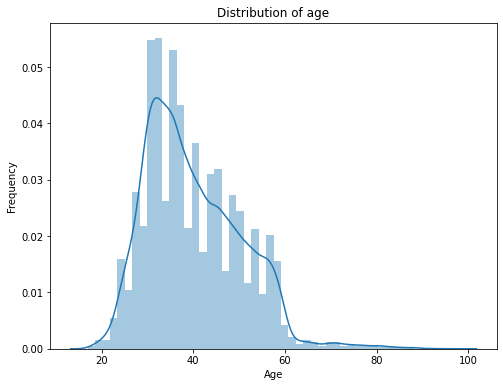

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')

**Its deviate slightly at right side.**
It should follow the normal distrubution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot - Outliers Detection')

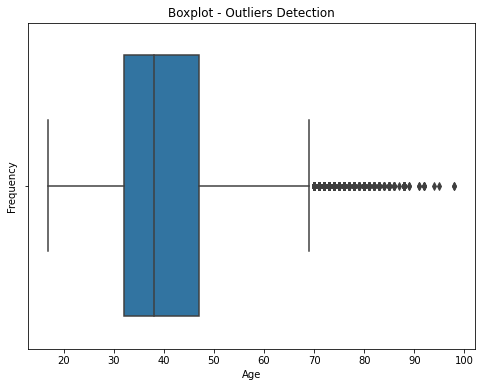

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Boxplot - Outliers Detection')

**Outliers detected, so we do boxcox transformation**

### Skewness & Kurtosis
* #### skewness = 0 : normally distributed.
* #### skewness > 0 : more weight in the left tail of the distribution.
* #### skewness < 0 : more weight in the right tail of the distribution.
* #### Kurtosis = 3 : normally distributed - Mesokurtic
* #### Kurtosis > 3 : normally distributed - Leptokurtic
* #### Kurtosis < 3 : normally distributed - Platykurtic

In [ ]:
import scipy #Scientific Python
print('Skewness',scipy.stats.skew(df.age))

Skewness 0.7845316793906337


In [ ]:
import scipy #Scientific Python
print('Kurtosis',scipy.stats.kurtosis(df.age))

Kurtosis 0.7908715485573286


### Boxcox Transformation Technique:-

In [ ]:
from scipy.stats import boxcox,boxcox_normmax

In [ ]:
df.age = boxcox(df.age,boxcox_normmax(df.age))

#### After Boxcox Transform:-

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of age - After Boxcox transformation')

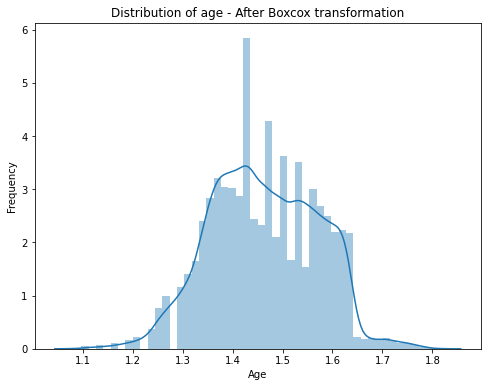

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age - After Boxcox transformation')

**Note :- Its not following the normal distribution even after doing boxcox transformation. Better we can drop this column.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot for Outliers Detection - After Boxcox transformation')

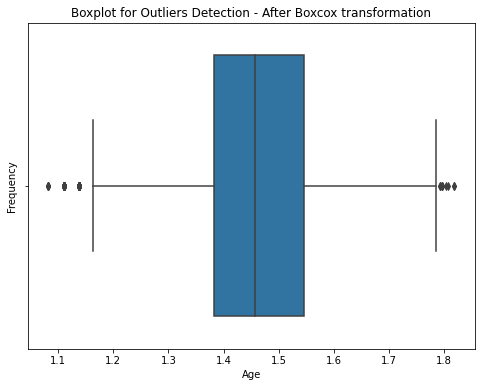

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Boxplot for Outliers Detection - After Boxcox transformation')

#### Now the outliers are removed after the boxcox technique

### Skewness & Kurtosis after Boxcox Transformation

In [ ]:
print('Skewness after Boxcox',scipy.stats.skew(df.age))
print('Kurtosis after Boxcox',scipy.stats.kurtosis(df.age))


Skewness after Boxcox -0.015576489484274815
Kurtosis after Boxcox -0.3805336657461118


#### Both the Skewness & Kurtosis are reduced after Boxcox Transformation.

* Before Boxcox:-
    *     Skewness 0.7845316793906337
    *     Kurtosis 0.7908715485573286
* After Boxcox :-
    *     Skewness -0.006389818305811041
    *     Kurtosis -0.38321858182694646

### Convert all categorical variable into numerical structure

#### Job:-

In [ ]:
df.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()

In [ ]:
df.job = l_enc.fit_transform(df.job)

In [ ]:
df.job.unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8])

#### Marital:-

In [ ]:
print(df.marital.unique())

['married' 'single' 'divorced' 'unknown']


In [ ]:
print(sorted(df.marital.unique()))

['divorced', 'married', 'single', 'unknown']


In [ ]:
df.marital = df.marital.replace(['divorced', 'married', 'single', 'unknown'],[0,1,2,3])

#### Education:-

In [ ]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
print(sorted(df.education.unique()))

['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']


In [ ]:
df.education = df.education.replace(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'],
                                    [0,1,2,3,4,5,6,7])

In [ ]:
df.education.unique()

array([0, 3, 1, 2, 5, 7, 6, 4])

#### Default:-

In [ ]:
df.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
print(sorted(df.default.unique()))

['no', 'unknown', 'yes']


In [ ]:
df.default = df.default.replace(['no', 'unknown', 'yes'],[0,1,2])

#### Housing:-

In [ ]:
df.housing = df.housing.replace(['no', 'unknown', 'yes'],[0,1,2])

#### Loan:-

In [ ]:
df.loan = df.loan.replace(['no', 'unknown', 'yes'],[0,1,2])

#### Contact:-

In [ ]:
df.contact = df.contact.replace(['telephone', 'cellular'],[1,0])

#### Month:-

In [ ]:
print(sorted(df.month.unique()))

['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


In [ ]:
df.month = df.month.replace(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'],range(0,10))

#### Day_of_week:-

In [ ]:
print(sorted(df.day_of_week.unique()))

['fri', 'mon', 'thu', 'tue', 'wed']


In [ ]:
df.day_of_week = df.day_of_week.replace(['fri', 'mon', 'thu', 'tue', 'wed'],[0,1,2,3,4])

#### Poutcome:-

In [ ]:
print(sorted(df.poutcome.unique()))

['failure', 'nonexistent', 'success']


In [ ]:
df.poutcome = df.poutcome.replace(['failure', 'nonexistent', 'success'],[0,1,2])

#### y - Output Variable or Dependent Variable:-

In [ ]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.y = df.y.replace(['no', 'yes'],[0,1])

In [ ]:
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16624,2.427489,0,2,6,0,2,0,0,3,4,...,2,999,0,1,1.4,93.918,-42.7,4.963,5228.1,1
32151,2.545941,1,1,7,1,0,0,0,6,0,...,1,999,1,0,-1.8,92.893,-46.2,1.313,5099.1,0
37424,2.395410,1,2,3,0,2,0,0,1,4,...,1,999,0,1,-2.9,92.201,-31.4,0.879,5076.2,0


## To check class Imbalanced or not:-

In [ ]:
df.y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='y', ylabel='count'>

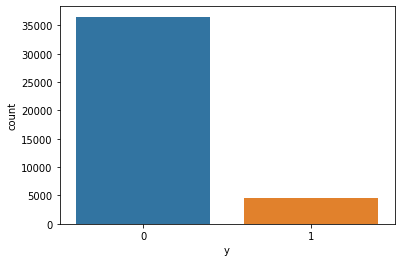

In [ ]:
sns.countplot(df.y)

#### Note :- Dataset is highly imbalanced so we need to use below technique to overcome this problem after the Train Test Split
#### SMOTE - SYNTHATIC MINORITY OF OVER SAMPLING TECHNIQUE

### To Identify Significant Variable:-

#### Correlation Graph:- Check Multicolinearity
*     Correlation between 2 input variables should be very low - Weak Correlation
*     Correlation between input & output variables should be very high - Strong Correlation

Note: We can straight away remove those input columns which is having more correlated.

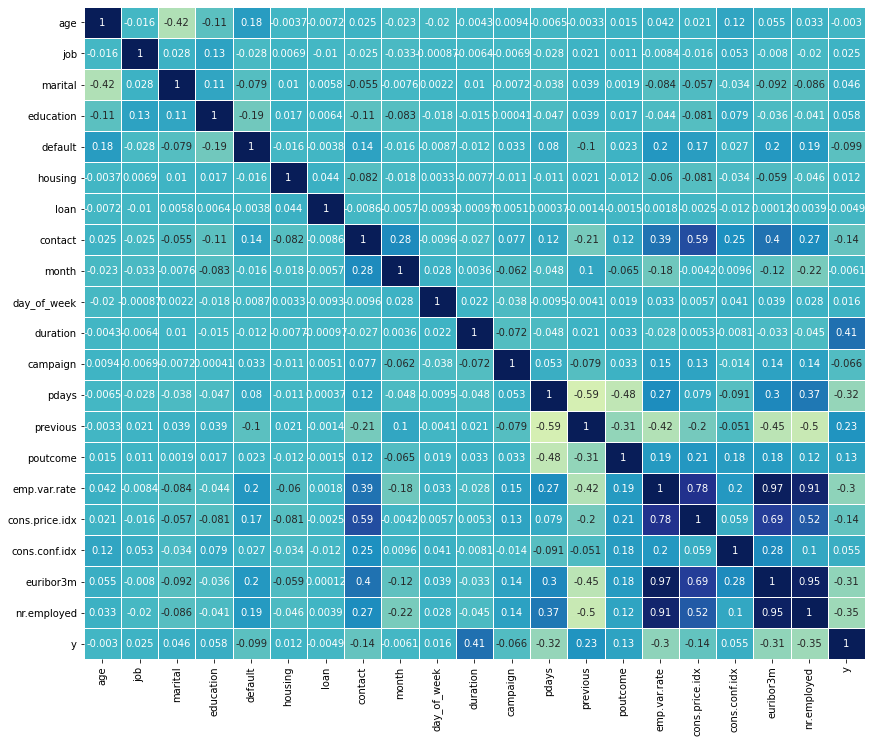

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),
            annot=True,
            linewidth=.5,
            center = 0,
            cbar=False,
            cmap='YlGnBu')
plt.show()

#### Below columns are highly correlated with another input columns except y column, so dropping the same.

In [ ]:
df = df.drop(['marital','contact','pdays','previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed','duration'],axis=1)

In [ ]:
df

,age,job,education,default,housing,loan,month,day_of_week,campaign,poutcome,y
0,2.692676,3,0,0,0,0,6,1,1,1,0
1,2.700105,7,3,1,0,0,6,1,1,1,0
2,2.510398,7,3,0,2,0,6,1,1,1,0
3,2.545941,0,1,0,0,0,6,1,1,1,0
4,2.692676,7,3,0,0,2,6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
41171,2.801034,5,5,0,2,0,7,0,1,1,1
41172,2.608183,1,5,0,0,0,7,0,1,1,0
41173,2.692676,5,6,0,2,0,7,0,2,1,0
41174,2.588590,9,5,0,0,0,7,0,1,1,1


#### Difine X & y variables:-

In [ ]:
X = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y']

In [ ]:
X

,age,job,education,default,housing,loan,month,day_of_week,campaign,poutcome
0,2.692676,3,0,0,0,0,6,1,1,1
1,2.700105,7,3,1,0,0,6,1,1,1
2,2.510398,7,3,0,2,0,6,1,1,1
3,2.545941,0,1,0,0,0,6,1,1,1
4,2.692676,7,3,0,0,2,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...
41171,2.801034,5,5,0,2,0,7,0,1,1
41172,2.608183,1,5,0,0,0,7,0,1,1
41173,2.692676,5,6,0,2,0,7,0,2,1
41174,2.588590,9,5,0,0,0,7,0,1,1


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41171,1
41172,0
41173,0
41174,1


### OLS Method (Oridinary Least Square) - To Identify Significant Variable
### p-value <= 0.05

In [ ]:
import statsmodels.api as sm

ols = sm.OLS(y,X).fit()

print(ols.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.142     
Dependent Variable:     y                AIC:                         20632.1918
Date:                   2021-04-12 07:15 BIC:                         20718.4479
No. Observations:       41176            Log-Likelihood:              -10306.   
Df Model:               10               F-statistic:                 685.1     
Df Residuals:           41166            Prob (F-statistic):          0.00      
R-squared (uncentered): 0.143            Scale:                       0.096613  
------------------------------------------------------------------------------------
                 Coef.      Std.Err.        t         P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
age              0.0043       0.0027       1.5812     0.1138     -0.0010      0.0096
job              0.0013       0.0004 

#### Note : P-value should be less than or equal to 0.05
#### From the above result, we are removing the age , loan, month coulumns,because of its P-value > 0.05

In [ ]:
df = df.drop(['age','loan','month'],axis =1)

In [ ]:
X = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y']

## To check class Imbalanced or not.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28823, 7)
(28823, 1)
(12353, 7)
(12353, 1)


In [ ]:
y_train.value_counts()

y
0    25618
1     3205
dtype: int64

#### Data is highly imbalanced, So apply SMOTE on your trining datset.
#### Note:- Dont apply SMOTE on testing data because its our original dataset which needs to be predicted
#### Over Sampling the Minority Class - by SMOTE (Synthetic Minority Over Sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 2)

os_X, os_y = os.fit_resample(X_train,y_train)

In [ ]:
os_y.value_counts()

y
0    25618
1    25618
dtype: int64

#### Now both the classes are balanced equally :)

### Algorithms Used:-
*     Logistic Regression
*     Decision Tree
*     Random Forest
*     KNN
    

## Model 1 :- Logistic Regression

#### 1.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

# Train Your Model
LR.fit(os_X,os_y)

# Predict the model
LR_predicted_y = LR.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# Confusion Matrix
LR_CM = confusion_matrix(y_test,LR_predicted_y)
print(LR_CM)

# Accuracy Score
Accuracy = round(accuracy_score(y_test,LR_predicted_y)*100,2)
print('LR_Accuracy is ', Accuracy)

[[4690 6229]
 [ 404 1030]]
LR_Accuracy is  46.3


In [ ]:
# Classification Report
print(classification_report(y_test,LR_predicted_y))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59     10919
           1       0.14      0.72      0.24      1434

    accuracy                           0.46     12353
   macro avg       0.53      0.57      0.41     12353
weighted avg       0.83      0.46      0.55     12353



#### 1.2 LR - Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [ ]:
# Bagging Classifier Technique
LR_Bagged = BaggingClassifier(base_estimator=LR,random_state=0)

# Train your model
LR_Bagged.fit(os_X,os_y)

# Predict the model
LR_Bagged_predicted_y = LR_Bagged.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# Confusion Matrix
LR_Bagged_CM = confusion_matrix(y_test,LR_Bagged_predicted_y)
print(LR_Bagged_CM)

# Accuracy Score
LR_Bagged_Accuracy = round(accuracy_score(y_test,LR_Bagged_predicted_y)*100,2)
print('LR_Bagged_Accuracy is ', LR_Bagged_Accuracy)

# Classification Report
print(classification_report(y_test,LR_Bagged_predicted_y))

[[4647 6272]
 [ 396 1038]]
LR_Bagged_Accuracy is  46.02
              precision    recall  f1-score   support

           0       0.92      0.43      0.58     10919
           1       0.14      0.72      0.24      1434

    accuracy                           0.46     12353
   macro avg       0.53      0.57      0.41     12353
weighted avg       0.83      0.46      0.54     12353



#### 1.3 LR - Boosting Classifier

In [ ]:
# Boosting Classifier Technique
LR_Ada_Boost = AdaBoostClassifier(base_estimator=LR,random_state=0)

# Train your model
LR_Ada_Boost.fit(os_X,os_y)

# Predict the model
LR_Adaboost_predicted_y = LR_Ada_Boost.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# Confusion Matrix
LR_Adaboost_CM = confusion_matrix(y_test,LR_Adaboost_predicted_y)
print(LR_Adaboost_CM)

# Accuracy Score
LR_Adaboost_Accuracy = round(accuracy_score(y_test,LR_Adaboost_predicted_y)*100,2)
print('LR_Adaboost_Accuracy is ', LR_Adaboost_Accuracy)

# Classification Report
print(classification_report(y_test,LR_Adaboost_predicted_y))

[[5094 5825]
 [ 445  989]]
LR_Adaboost_Accuracy is  49.24
              precision    recall  f1-score   support

           0       0.92      0.47      0.62     10919
           1       0.15      0.69      0.24      1434

    accuracy                           0.49     12353
   macro avg       0.53      0.58      0.43     12353
weighted avg       0.83      0.49      0.58     12353



#### 1.4 Parameter Optimization
*     GridSearchCV
*     RandomisedSearchCV

In [ ]:
param = {'n_estimators': np.arange(1,10)}
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# LR_Bagged_GS = GridSearchCV(LR_Bagged,param, cv= kfold ,scoring= accuracy_score) # Taking more time consumption, went through RandomisedSearchCV
# LR_Bagged_GS.fit(X,y)

LR_Bagged_RS = RandomizedSearchCV(LR_Bagged,param, cv= kfold ,scoring= accuracy_score)
LR_Bagged_RS.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass normalize=       y
6      0
18     0
22     0
24     0
28     0
...   ..
41155  0
41165  0
41166  1
41167  0
41174  1

[8236 rows x 1 columns] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:687:

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=BaggingClassifier(base_estimator=LogisticRegression(),
                                               random_state=0),
                   param_distributions={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring=<function accuracy_score at 0x7f28759ae710>)

In [ ]:
# print(LR_Bagged_GS.best_params_)
print(LR_Bagged_RS.best_params_)
# LR_RS_n_estimators = LR_Bagged_RS['n_estimators']

{'n_estimators': 1}


In [ ]:
LR_Bagged_Kfold = BaggingClassifier(base_estimator=LR,n_estimators=1,random_state=0)

# Train your model
LR_Bagged_Kfold.fit(os_X,os_y)

# Predict your model
LR_Bagged_Kfold_predicted_y = LR_Bagged_Kfold.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# Confusion Matrix
LR_Bagged_Kfold_CM = confusion_matrix(y_test,LR_Bagged_Kfold_predicted_y)
print(LR_Bagged_Kfold_CM)

# Accuracy Score
LR_Bagged_Kfold_Accuracy = round(accuracy_score(y_test,LR_Bagged_Kfold_predicted_y)*100,2)
print('LR_Bagged_Kfold_Accuracy is ', LR_Bagged_Kfold_Accuracy)

# Classification Report
print(classification_report(y_test,LR_Bagged_Kfold_predicted_y))

[[4506 6413]
 [ 377 1057]]
LR_Bagged_Kfold_Accuracy is  45.03
              precision    recall  f1-score   support

           0       0.92      0.41      0.57     10919
           1       0.14      0.74      0.24      1434

    accuracy                           0.45     12353
   macro avg       0.53      0.57      0.40     12353
weighted avg       0.83      0.45      0.53     12353



In [ ]:
print(4506/(4506+377))
print(1057/(1057+6413))

0.9227933647347942
0.14149933065595716


## Model 5:- SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM = SVC()

SVM.fit(os_X,os_y)

SVM_predicted_y = SVM.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# Confusion Matrix
SVM_CM = confusion_matrix(y_test,SVM_predicted_y)
print(SVM_CM)

# Accuracy Score
SVM_Accuracy_Score = round(accuracy_score(y_test,SVM_predicted_y)*100,2)
print('SVM_Accuracy_Score is ', SVM_Accuracy_Score)

# Classification Report
print(classification_report(y_test,SVM_predicted_y))

[[5830 5089]
 [ 457  977]]
SVM_Accuracy_Score is  55.1
              precision    recall  f1-score   support

           0       0.93      0.53      0.68     10919
           1       0.16      0.68      0.26      1434

    accuracy                           0.55     12353
   macro avg       0.54      0.61      0.47     12353
weighted avg       0.84      0.55      0.63     12353



## Model 6:- Naive Bias

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()

NB.fit(os_X,os_y)

NB_predicted_y = NB.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# Confusion Matrix
NB_CM = confusion_matrix(y_test,NB_predicted_y)
print(NB_CM)

# Accuracy Score
NB_Accuracy_Score = round(accuracy_score(y_test,NB_predicted_y)*100,2)
print('NB_Accuracy_Score is ', NB_Accuracy_Score)

# Classification Report
print(classification_report(y_test,NB_predicted_y))

[[3449 7470]
 [ 211 1223]]
NB_Accuracy_Score is  37.82
              precision    recall  f1-score   support

           0       0.94      0.32      0.47     10919
           1       0.14      0.85      0.24      1434

    accuracy                           0.38     12353
   macro avg       0.54      0.58      0.36     12353
weighted avg       0.85      0.38      0.45     12353



#### Note : Finally I choose the model GaussianNB as best model to identify potential customers who opening the term deposit. Even though the model has very low accuracy but the FPR rate is very less.
####        For better Accuracy model, we can take KNN model as 75.58 % Accuracy Score.[](http://)